In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pycountry


<AxesSubplot: >

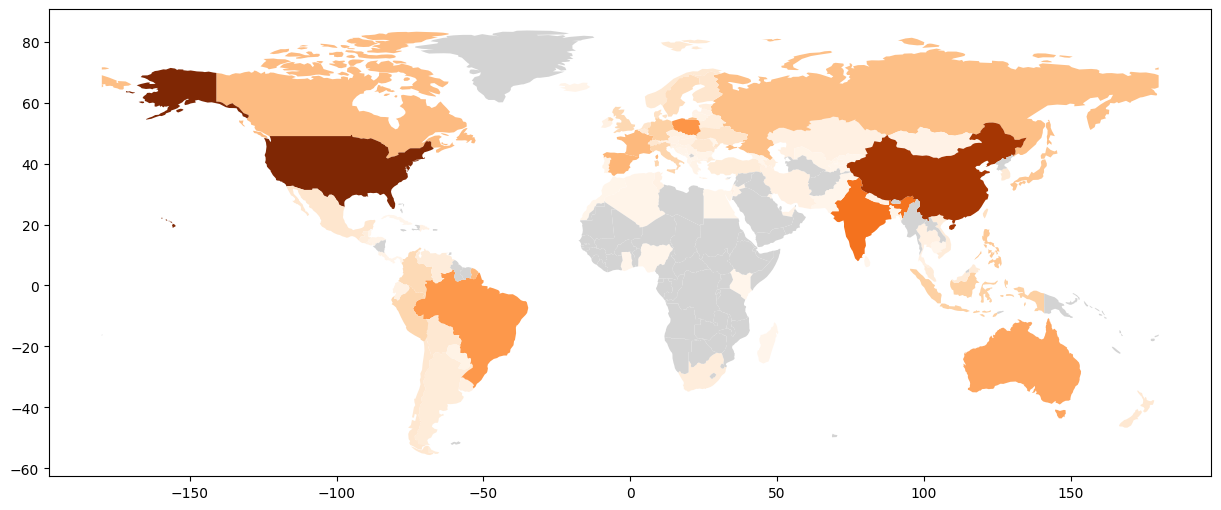

In [30]:
# Heatmap of countries where cubing competitions have been held

countryComps = pd.read_csv("../datasets/countryComps.csv", delimiter=',')
countryComps = countryComps.sort_values(['count'], ascending=False).reset_index().drop(columns=['index'])
countryComps['iso3'] = np.NAN

for i in range(len(countryComps)):
    countryComps.at[i, 'iso3'] = pycountry.countries.get(alpha_2=countryComps.iloc[i]['iso2']).alpha_3

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")].reset_index().drop(columns=['index'])

world['count'] = np.NAN
for i in range(len(world)):
    code = world.iloc[i].iso_a3
    row = countryComps[countryComps['iso3'] == code]
    if code == "USA":
        world.at[i, 'count'] = 700
        continue
    if len(row) == 0:
        world.at[i, 'count'] = np.nan
    else:
        world.at[i, 'count'] = row['count']

plt.rcParams['figure.figsize'] = (15, 10)
world.plot(column='count',
           cmap='Oranges',
           missing_kwds={
        "color": "lightgrey",
        # "edgecolor": "red",
        # "hatch": "///",
        "label": "Missing values",
    },)



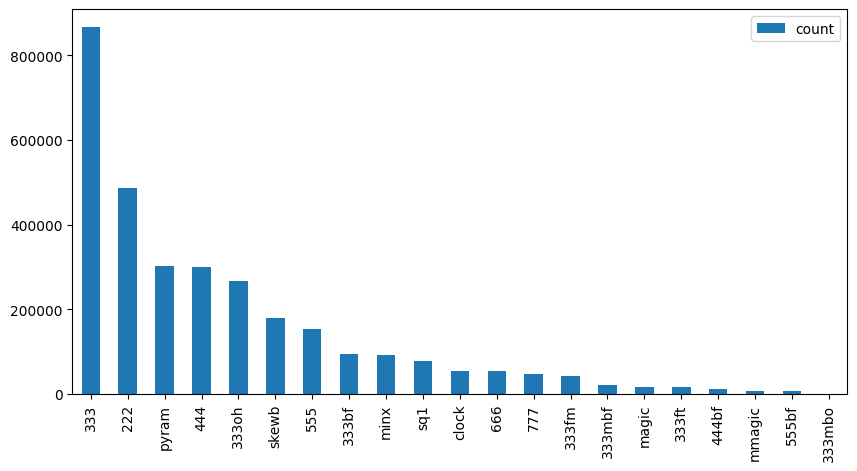

In [55]:
eventCountDf = pd.read_csv("../datasets/eventCount.csv", delimiter=',')
plt.rcParams['figure.figsize'] = (10, 5)
ax = eventCountDf.plot(kind='bar')
ax.set_xticks(ticks=eventCountDf.index, labels=eventCountDf.event)

